# Task 2
# Kalman filter

## System description

Consider a model of horizontal movement of a surface vessel. Let us assume that the thrust force compensates for the longitudinal hydrodynamic resistance and the motion occurs at a constant speed $V_0 = V_x = const$.



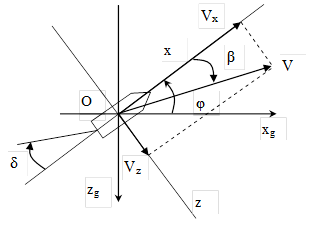

In [ ]:
%matplotlib inline
from IPython.display import Image
Image('model.png', width=500)

The motion dynamics can be described by the following system of equations:

$$
\left[
    \begin{array}{c}
        \dot{\varphi} \\
        \dot{\omega} \\
        \dot{V}
    \end{array}
\right] = 

\left[
    \begin{array}{ccc}
        0 & 1 & 0 \\
        0 & a_{22} & a_{23}/V_0 \\
        0 & a_{32}V_0 & a_{33}
    \end{array}
\right] 
\left[
    \begin{array}{c}
        \varphi \\
        \omega \\
        V
    \end{array}
\right] +

\left[
    \begin{array}{c}
        0 \\
        b_{21} \\
        b_{31}
    \end{array}
\right] \delta
$$

where $\phi$ is a vessel's heading direction, $\omega$ is a vessel's angular velocity, $V_z$ is a vessel's transverse speed, $\delta$ is vessel's rudder angle,
$a_{22}=-328$,  $a_{23}=2060$, $a_{32}=0.58$, $a_{33}=-5150$, $b_{21}=1$, $b_{31}=18$  are constants.

The heading direction of the vessel is available for measurement with an error with a normal distribution and zero mean. The deviation of the model from the vessel is also described by a normal distribution with zero mean.

## Task

1. Definre vessel parameters.
2. Define model variances (heading direction, angular velocity and transverse velocity) and sensor variance.
3. Model the vessel's trajectory for 4 different rudder angles.
4. Build a Kalman filter to assess the state of the vessel.
5. Plot graphs of measurement and estimates of state variables.
6. Get formulas for determining the global coordinates of the vessel from state variables.
7. Plot the vessel's trajectory, its measurement and estimates.

1. Define vessel parameters

In [1]:
import numpy as np

a22=-3
a23=2
a32=0.58
a33=-5
b21=1
b31=18
v0=10
A = np.array([[0,1,0], [0, a22, a23/v0], [0, a32*v0, a33]])
B = np.array([0, b21, b31]).T
x = [0, 0, 0.1]
dt = 0.1

In [44]:
10*np.pi/180

0.17453292519943295

2. Define model variances

3. Trajectory for 4 different rudder angles

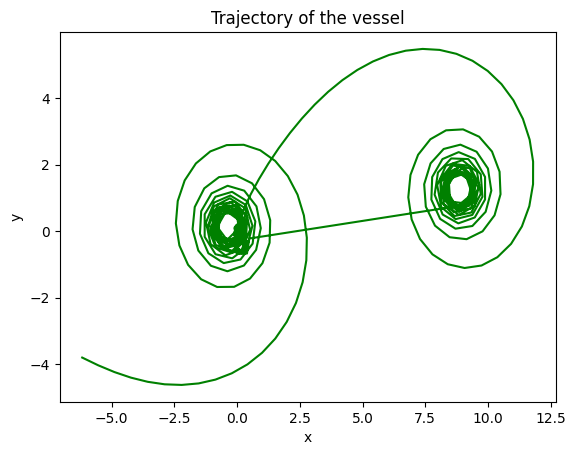

In [244]:
import matplotlib.pyplot as plt
from scipy import integrate

s_th = 0.08
s_w = 0.3
s_v = 0.2
s_m = 0.1


def model(N,x, x_r, u):
    
    th = []
    th_r = []
    w = []
    v = []
    xx = []
    yy = []
    xx_r = []
    yy_r = []
    xx_m = []
    yy_m = []
    posx = 0
    posy = 0
    posx_r = 0
    posy_r = 0
    a22=-3
    a23=2
    a32=0.58
    a33=-5
    b21=1
    b31=18
    v0=10

    A = np.array([[0,1,0], [0, a22,a23/v0], [0,a32*v0,a33]])
    B = np.array([0,b21,b31])
    C = np.array([[1, 0,0]])
    
    dt = 0.1
    # A=np.eye(3)+A*dt
    # B=B*dt
    fi_r = 0
    fi_n = 0
    for i in np.arange(0,N, dt):
        noise = np.array([np.random.normal(0, s_th),np.random.normal(0, s_w), np.random.normal(0, s_v)])

        x_0 = np.matmul(A, x_r) + B*u
        x_r =x_r+ x_0*dt
        x_1 = np.matmul(A, x) + B*u + noise
        x =x+ x_1*dt

        fi_r+=x_r[0]*dt
        fi_r = fi_r%(2*np.pi)
        fi_n= fi_r + x_r[0]*dt+ np.random.normal(0, s_m)
        fi_n = fi_n%(2*np.pi)
        th.append(fi_n)
        th_r.append(fi_r)
        w.append(x[0])
        v.append(x[1])

        vv = x[2]
        cosB = vv/v0
        beta = np.arccos(cosB)
        posx +=vv*dt*np.cos(fi_n-beta) 
        posy +=vv*dt*np.sin(fi_n-beta) 

        vv = x_r[2]
        cosB = vv/v0
        beta = np.arccos(cosB)
        posx_r +=vv*dt*np.cos(fi_r-beta)
        posy_r +=vv*dt*np.sin(fi_r-beta)
        
        xx.append(posx)
        yy.append(posy)
        xx_r.append(posx_r)
        yy_r.append(posy_r)

    return th, th_r,w,v, xx, yy, xx_r, yy_r, x, x_r

def show(th,w,v):
    l = len(th)
    plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    plt.title("Theta")
    plt.plot(np.arange(0,l)*dt, th)

    plt.subplot(1,3,2)
    plt.title("w")
    plt.plot(np.arange(0,l)*dt, w)

    plt.subplot(1,3,3)
    plt.title("v")
    plt.plot(np.arange(0, l)*dt, v)

def plotxy(ax, x,y,c = 'b'):
    
    ax.plot(x,y, c)
    ax.set_title("Trajectory of the vessel")
    ax.set_xlabel("x")
    ax.set_ylabel("y")




u = [-np.pi/2, -np.pi/4, np.pi/4, np.pi/2]
ts = np.array([15, 5, 5, 15])

t = 0
N = 15
dt = 0.1

xx_all = []
yy_all = []
th_all = []
th_r_all = []
w_all = []
v_all = []
xx_r_all = []
yy_r_all = []
x = np.array([0,0,0])
x_r = np.array([0,0,0])
for i, uu in enumerate(u):
    th,th_r, w,v,xx,yy, xx_r, yy_r, state, state_r = model(ts[i],x,x_r, uu)
    
    x = state
    x_r = state_r
    xx_all +=xx
    yy_all += yy
    th_all +=th
    th_r_all+= th_r
    w_all +=w
    v_all +=v
    xx_r_all+=xx_r
    yy_r_all+= yy_r

fig, ax = plt.subplots()

plotxy(ax, xx_r_all,yy_r_all, 'green')

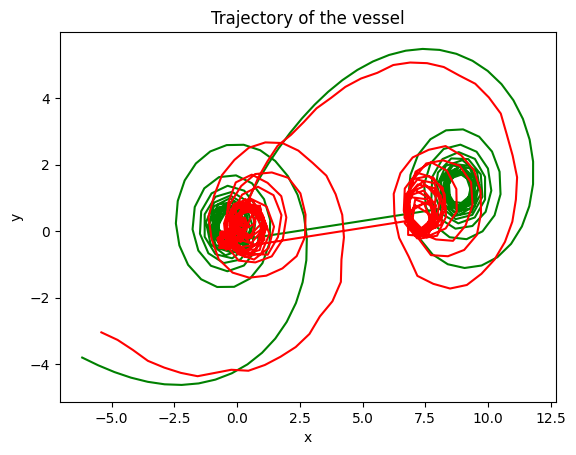

In [245]:
fig, ax = plt.subplots()
plotxy(ax, xx_r_all,yy_r_all, 'green')
plotxy(ax, xx_all,yy_all, 'red')

State variables over time

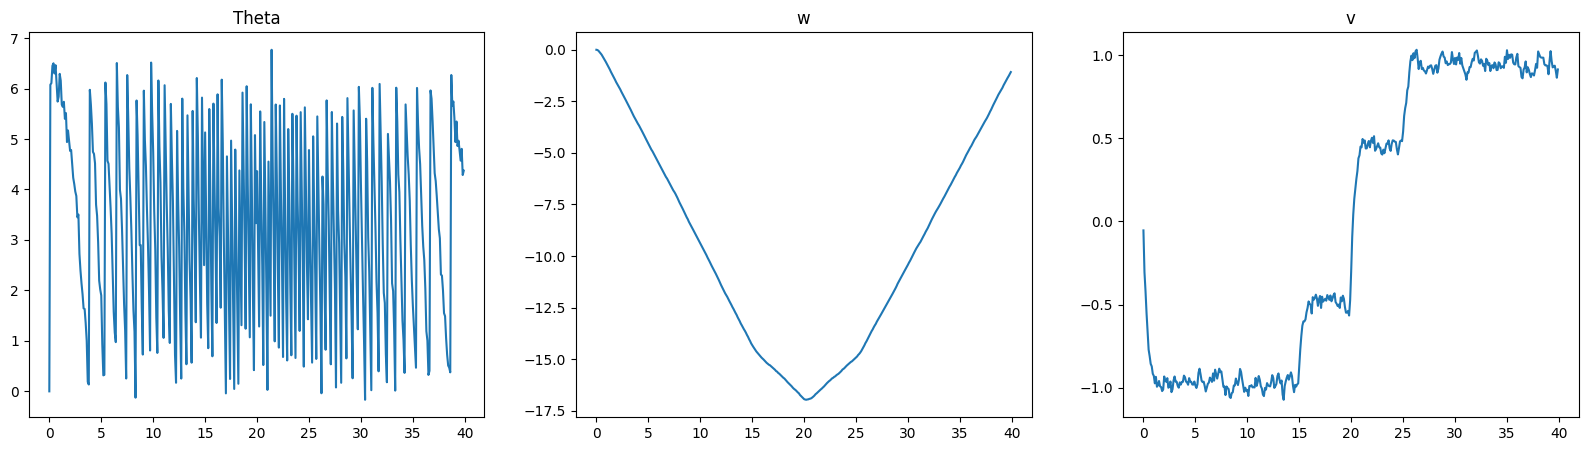

In [47]:
show(th_all,w_all,v_all)

Simpler case: Only one rudder angle

In [ ]:
s_th = 0.03
s_w = 0.01
s_v = 0.01
s_m = 0.03

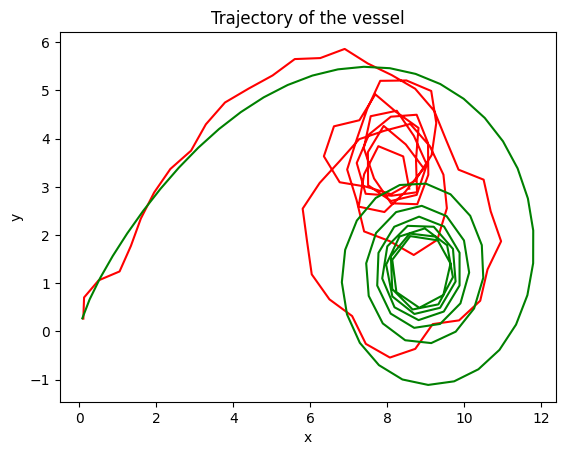

In [237]:
import matplotlib.pyplot as plt
from scipy import integrate




s_th = 0.3
s_w = 0.5
s_v = 0.5
s_m = 0.3

def model(N,x, x_r, u):
    
    th = []
    th_r = []
    w = []
    v = []
    xx = []
    yy = []
    xx_r = []
    yy_r = []
    xx_m = []
    yy_m = []
    posx = 0
    posy = 0
    posx_r = 0
    posy_r = 0
    a22=-3
    a23=2
    a32=0.58
    a33=-5
    b21=1
    b31=18
    v0=10

    A = np.array([[0,1,0], [0, a22,a23/v0], [0,a32*v0,a33]])
    B = np.array([0,b21,b31])
    C = np.array([[1, 0,0]])
    
    dt = 0.1
    # A=np.eye(3)+A*dt
    # B=B*dt
    fi_r = 0
    fi_n = 0
    for i in np.arange(0,N, dt):
        noise = np.array([np.random.normal(0, s_th),np.random.normal(0, s_w), np.random.normal(0, s_v)])

        x_0 = np.matmul(A, x_r) + B*u
        x_r =x_r+ x_0*dt
        x_1 = np.matmul(A, x) + B*u + noise
        x =x+ x_1*dt

        fi_r+=x_r[0]*dt
        fi_r = fi_r%(2*np.pi)
        fi_n= fi_r + x_r[0]*dt+ np.random.normal(0, s_m)
        fi_n = fi_n%(2*np.pi)
        th.append(fi_n)
        th_r.append(fi_r)
        w.append(x[0])
        v.append(x[1])

        vv = x[2]
        cosB = vv/v0
        beta = np.arccos(cosB)
        posx +=vv*dt*np.cos(fi_n-beta) 
        posy +=vv*dt*np.sin(fi_n-beta) 

        vv = x_r[2]
        cosB = vv/v0
        beta = np.arccos(cosB)
        posx_r +=vv*dt*np.cos(fi_r-beta)
        posy_r +=vv*dt*np.sin(fi_r-beta)
        
        xx.append(posx)
        yy.append(posy)
        xx_r.append(posx_r)
        yy_r.append(posy_r)

    return th, th_r,w,v, xx, yy, xx_r, yy_r, x, x_r

def show(th,w,v):
    l = len(th)
    plt.figure(figsize = (20,5))
    plt.subplot(1,3,1)
    plt.title("Theta")
    plt.plot(np.arange(0,l)*dt, th)

    plt.subplot(1,3,2)
    plt.title("w")
    plt.plot(np.arange(0,l)*dt, w)

    plt.subplot(1,3,3)
    plt.title("v")
    plt.plot(np.arange(0, l)*dt, v)

def plotxy(ax, x,y,c = 'b'):
    
    ax.plot(x,y, c)
    ax.set_title("Trajectory of the vessel")
    ax.set_xlabel("x")
    ax.set_ylabel("y")




u = [-np.pi/2, -np.pi/4, np.pi/4, np.pi/2]
ts = np.array([15, 5, 5, 15])

t = 0
N = 15
dt = 0.1

xx_all = []
yy_all = []
th_all = []
th_r_all = []
w_all = []
v_all = []
xx_r_all = []
yy_r_all = []
x = np.array([0,0,0])
x_r = np.array([0,0,0])

th,th_r, w,v,xx,yy, xx_r, yy_r, state, state_r = model(10,x,x_r, u[0])


fig, ax = plt.subplots()

plotxy(ax, xx,yy, 'red')
plotxy(ax, xx_r,yy_r, 'green')

In [226]:
np.random.normal(0, 0.3)

-0.09685034064663384

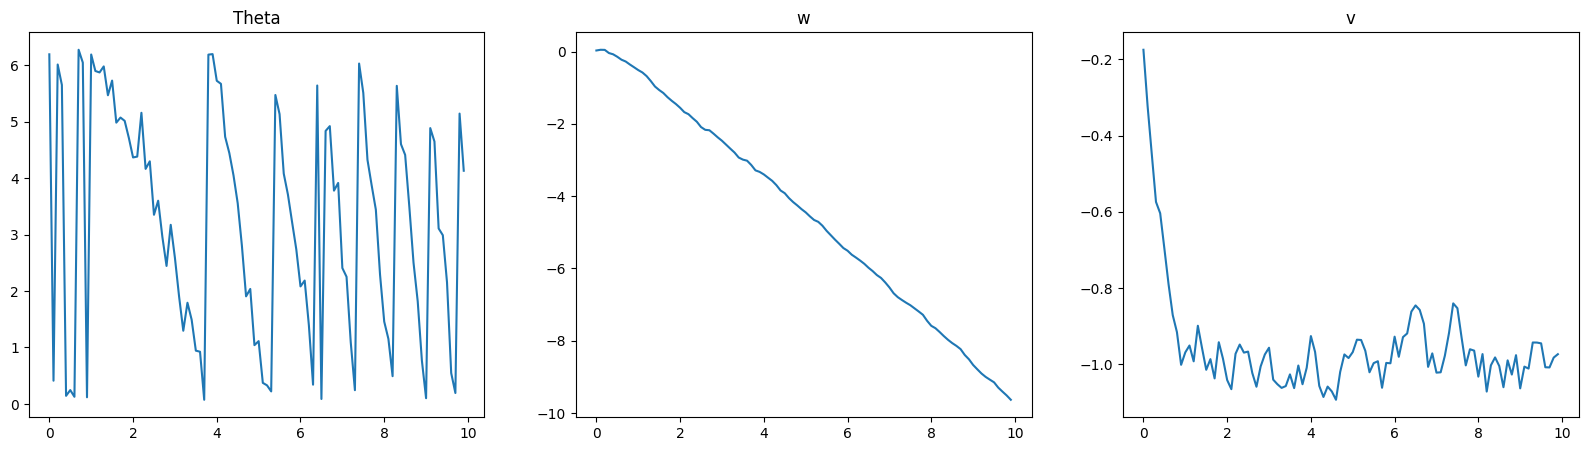

In [238]:
show(th,w,v)

Kalman filter

In [239]:
a22=-3
a23=2
a32=0.58
a33=-5
b21=1
b31=18
v0=10

A = np.array([[0,1,0], [0, a22,a23/v0], [0,a32*v0,a33]])
A = np.eye(3)+A*dt
B = np.array([[0],[b21],[b31]])
B = B*dt
C = np.array([[1, 0,0]])


sigma_z = s_m
Ez = sigma_z**2
accel_noise_mag = 0.02 # acceleration measurement error
Ex = accel_noise_mag*np.array([[s_th*dt**2, s_w*s_v*dt**2, s_th*s_v*dt**2], [s_w*s_th*dt**2, s_w*s_w*dt**2, s_w*s_v*dt**2],[s_th*s_v*dt**2,s_w*s_v*dt**2,s_v*s_v*dt**2]])

p_est = []
v_est = []
x = np.array([[0],[0],[0]])
Sigma = Ex.copy() # initial covariance
fi_r = 0
posx = 0
posy = 0
all_x = []
all_y = []
for i in range(len(th_r)):

    x_pred = np.matmul(A, x) + B*u[0]
    Sigma_pred = np.matmul(np.matmul(A, Sigma), A.T)# + Ex

    temp = np.matmul(C, Sigma_pred)
    temp = np.matmul(temp, C.T)
    temp = temp + Ez

    temp = np.linalg.inv( temp)
    temp = np.matmul(C.T, temp)
        
    K = np.matmul(Sigma_pred, temp)
    
    x = x_pred + K* ( th_r[i] - np.matmul(A, x_pred))
    p_est.append(x[0][0])
    v_est.append(x[2][0])
    
    temp = np.eye(3) - np.matmul(K, C)
    Sigma = np.matmul(temp, Sigma_pred)

    fi_r+=x[0][0]*dt
    vv = x[2][0]
    cosB = vv/v0
    beta = np.arccos(cosB)
    posx +=vv*dt*np.cos(fi_r-beta) 
    posy +=vv*dt*np.sin(fi_r-beta) 
    all_x.append(posx)
    all_y.append(posy)
    

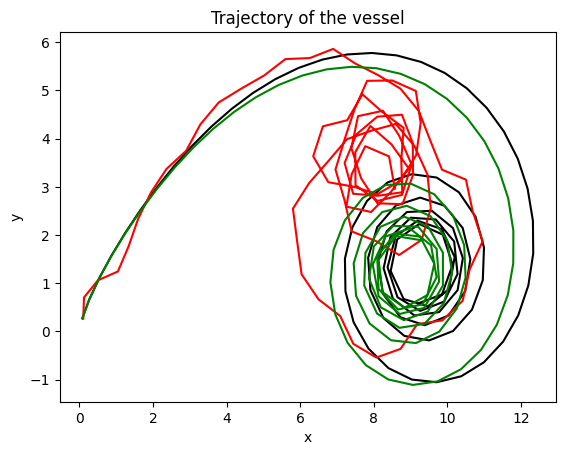

In [240]:
fig, ax = plt.subplots()
plotxy(ax, all_x, all_y, 'black')
plotxy(ax, xx,yy, 'red')
plotxy(ax, xx_r,yy_r, 'green')